# Hands-on Tutorial - Using the Allen SDK to find and access data

### Saturday, November 3, 2018

In this tutorial, we are going to explore how do access calcium imaging data from the Allen Brain Observatory through the AllenSDK.

Prerequesites:

- Install allensdk: http://alleninstitute.github.io/AllenSDK/install.html

OR

- Spin up AWS instance: https://github.com/AllenInstitute/AllenSDK/wiki/Use-the-Allen-Brain-Observatory-%E2%80%93-Visual-Coding-on-AWS


## Today's Tutorial

1. Searching for experiments
3. Get data from an experiment
4. Query neurons
5. Plot one neuron's responses to one stimulus

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Searching for experiments 

The main entry point is the `BrainObservatoryCache` class.  This class is responsible for downloading any requested data or metadata as needed and storing it in well known locations.  

We begin by importing the `BrainObservatoryCache` class and instantiating it, pointing it to our manifest file.

`manifest_file` is a path to the manifest file.  This needs to reflect where you are storing and accessing the data.

In [2]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
boc = BrainObservatoryCache()

The Brain Observatory Cache allows us to understand the dimensions of the data in the dataset... the conditions under which each experiment was acquired

Let's take a look at the available **depths**, **cre lines**, **areas**, and **stimuli** available in the Brain Observatory dataset.

In [3]:
# list of all targeted areas, using Allen Brain Atlas nomenclature
boc.get_all_targeted_structures()

[u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl']

In [4]:
# list of all imaging depths
boc.get_all_imaging_depths()

[175,
 185,
 195,
 200,
 205,
 225,
 250,
 265,
 275,
 276,
 285,
 300,
 320,
 325,
 335,
 350,
 365,
 375,
 390,
 400,
 550,
 570,
 625]

In [5]:
# list of all cre driver lines 
boc.get_all_cre_lines()

[u'Cux2-CreERT2',
 u'Emx1-IRES-Cre',
 u'Fezf2-CreER',
 u'Nr5a1-Cre',
 u'Ntsr1-Cre_GN220',
 u'Pvalb-IRES-Cre',
 u'Rbp4-Cre_KL100',
 u'Rorb-IRES2-Cre',
 u'Scnn1a-Tg3-Cre',
 u'Slc17a7-IRES2-Cre',
 u'Sst-IRES-Cre',
 u'Tlx3-Cre_PL56',
 u'Vip-IRES-Cre']

In [6]:
# list of all GCaMP reporter lines
boc.get_all_reporter_lines()

[u'Ai148(TIT2L-GC6f-ICL-tTA2)',
 u'Ai162(TIT2L-GC6s-ICL-tTA2)',
 u'Ai93(TITL-GCaMP6f)',
 u'Ai93(TITL-GCaMP6f)-hyg',
 u'Ai94(TITL-GCaMP6s)']

In [7]:
# list of all stimuli
boc.get_all_stimuli()

['drifting_gratings',
 'locally_sparse_noise',
 'locally_sparse_noise_4deg',
 'locally_sparse_noise_8deg',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']

In [8]:
# Ai93: fast
# Ai94: slow
# Ai148: fast
# Ai 162: slow

### 1.1 Experiment containers & sessions

The experiment container describes a set of 3 experiment sessions performed for the same field of view (ie. same targeted area and imaging depth in the same mouse that targets the same set of cells). Each experiment container has a unique ID number.

> Choose a visual area and Cre line from the lists above

In [9]:
visual_area = 'VISal'
cre_line ='Cux2-CreERT2'

> Get the list of all the experiment containers for that area and Cre line combination.

In [10]:
exps = boc.get_experiment_containers(
    targeted_structures=[visual_area], 
    cre_lines=[cre_line],
)

In [11]:
exps = pd.DataFrame(exps)
exps

,cre_line,donor_name,failed,id,imaging_depth,reporter_line,specimen_name,tags,targeted_structure
0,Cux2-CreERT2,233215,False,511854338,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-233215,[],VISal
1,Cux2-CreERT2,339323,False,698102441,276,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-339323,[],VISal
2,Cux2-CreERT2,222426,False,511510715,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],VISal
3,Cux2-CreERT2,339323,False,638056632,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-339323,[],VISal
4,Cux2-CreERT2,228379,False,511510867,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-228379,[],VISal
5,Cux2-CreERT2,229105,False,511510998,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-229105,[Epileptiform Events],VISal
6,Cux2-CreERT2,222420,False,511510664,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222420,[],VISal
7,Cux2-CreERT2,225036,False,511510797,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-225036,[],VISal
8,Cux2-CreERT2,222425,False,511510695,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222425,[],VISal
9,Cux2-CreERT2,228378,False,511511052,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-228378,[],VISal


> Let's look at one experiment container, imaged from Cux2, in VISp, from imaging depth 175 um.

In [12]:
experiment_container_id = 511510736

In [13]:
boc.get_ophys_experiments(
    experiment_container_ids=[experiment_container_id],
)

[{'acquisition_age_days': 104,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222426',
  'experiment_container_id': 511510736,
  'fail_eye_tracking': True,
  'id': 501704220,
  'imaging_depth': 175,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_A',
  'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
  'targeted_structure': u'VISp'},
 {'acquisition_age_days': 103,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222426',
  'experiment_container_id': 511510736,
  'fail_eye_tracking': True,
  'id': 501559087,
  'imaging_depth': 175,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_B',
  'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
  'targeted_structure': u'VISp'},
 {'acquisition_age_days': 102,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222426',
  'experiment_container_id': 511510736,
  'fail_eye_tracking': True,
  'id': 501474098,
  'imaging_depth': 175,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'sessio

!['Diagram of containers'](http://alleninstitute.github.io/AllenSDK/_static/container_session_layout.png)

In [14]:
boc.get_ophys_experiments(
    experiment_container_ids=[experiment_container_id], 
    stimuli=['natural_scenes'],
)

[{'acquisition_age_days': 103,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222426',
  'experiment_container_id': 511510736,
  'fail_eye_tracking': True,
  'id': 501559087,
  'imaging_depth': 175,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_B',
  'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
  'targeted_structure': u'VISp'}]

In [15]:
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], 
                                       stimuli=['natural_scenes'])[0]['id']
print session_id

501559087


## 2. Get data from an experiment

The Ophys Experiment data object gives us access to everything in the NWB file for a single imaging session

In [16]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

2018-11-03 08:03:21,351 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/514429113


In [19]:
# data_set.get_

### 2.1 Maximum projection
This is the projection of the full motion corrected movie. It shows all of the cells imaged during the session.

In [20]:
max_projection = data_set.get_max_projection()

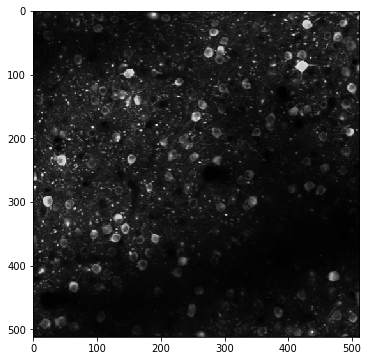

In [21]:
fig = plt.figure(figsize=(6,6))
plt.imshow(max_projection, cmap='gray')

### 2.3 ROI Masks
These are all of the segmented masks for cell bodies in this experiment.

In [22]:
rois = data_set.get_roi_mask_array()

In [23]:
print rois.shape
print "Number of cells:", rois.shape[0]

(174L, 512L, 512L)
Number of cells: 174


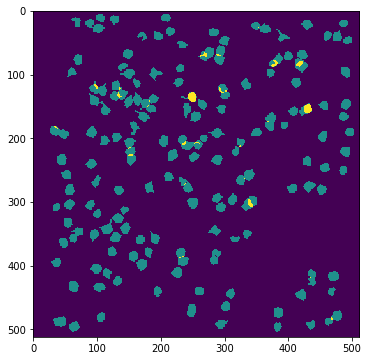

In [24]:
plt.figure(figsize=(6,6))
plt.imshow(rois.sum(axis=0))

### 2.4 DF/F Traces
There are a number of accessible traces in the NWB file, including raw fluorescence, neuropil corrected traces, demixed traces, and DF/F traces. 

In [25]:
ts, dff = data_set.get_dff_traces()

In [26]:
dff.shape

(174L, 113888L)

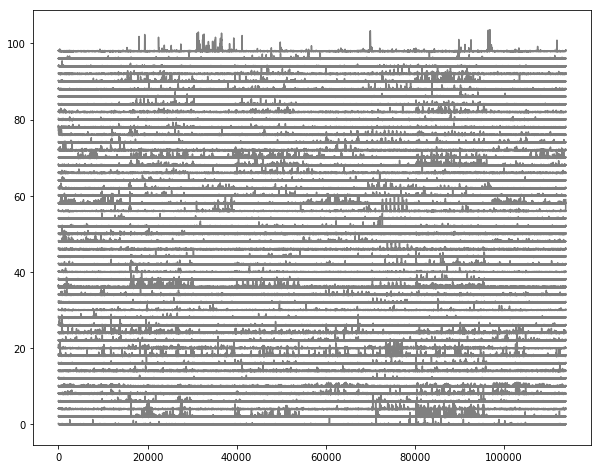

In [27]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')

> It looks like different cells are active at different times. What could that be about?

### 2.5 Stimulus epochs

Several stimuli are shown during each imaging session, interleaved with each other. The stimulus epoch table provides information of these interleaved stimulus epochs


In [28]:
stim_epoch = data_set.get_stimulus_epoch_table()

In [29]:
stim_epoch

,stimulus,start,end
0,static_gratings,747,15196
1,natural_scenes,16100,30551
2,spontaneous,30701,39581
3,natural_scenes,39582,54050
4,static_gratings,54953,69403
5,natural_movie_one,70307,79338
6,natural_scenes,80241,96126
7,static_gratings,97406,113662


> Overlay stimulus epochs on the DFF traces

In [30]:
stim_epoch.stimulus.unique()

array([u'static_gratings', u'natural_scenes', u'spontaneous',
       u'natural_movie_one'], dtype=object)

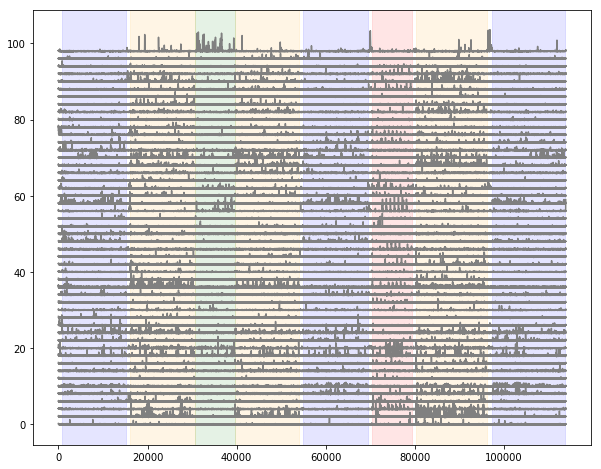

In [31]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

> Details of stimulus presentation per trial can be found in the stimulus_table and the images and movies presented can be found in the stimulus_template

### 2.6 Stimulus Table
For each stimulus there is a stimulus table with information about the condition and timing of each trial. 

In [32]:
natural_scene_table = data_set.get_stimulus_table('natural_scenes')

In [33]:
natural_scene_table.head()

,frame,start,end
0,81,16100,16107
1,33,16108,16115
2,76,16115,16122
3,13,16123,16130
4,56,16130,16137


### 2.7 Stimulus Template

The images and movies presented during the session area also included in the NWB file as the stimulus template. Stimuli that are generated programmatically (eg. drifting and static gratings) do not have a stimulus template. There are tools in the SDK to recreate these stimuli.

In [34]:
natural_scene_template = data_set.get_stimulus_template('natural_scenes')

In [35]:
natural_scene_template.shape

(118L, 918L, 1174L)

> Look at the scene presented for the first trial

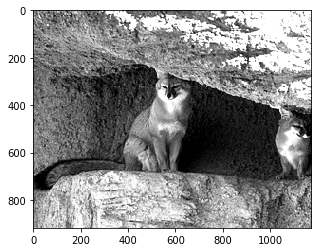

In [36]:
scene_number = natural_scene_table.frame.loc[3]
plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')

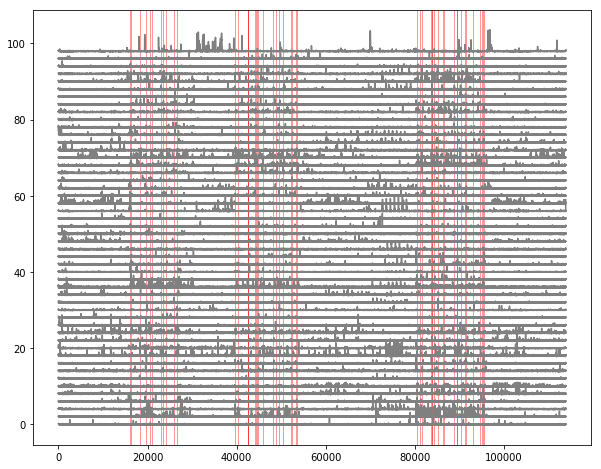

In [37]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#shade traces with the time of each presentation of the above scene
stim_subset = natural_scene_table[natural_scene_table.frame==scene_number]
for j in range(len(stim_subset)):
    plt.axvspan(xmin=stim_subset.start.iloc[j], xmax=stim_subset.end.iloc[j], color='red', alpha=0.4)

### 2.8 Running speed

The running speed of the animal on the rotating disk during the entire session.

In [38]:
dxcm, tsd = data_set.get_running_speed()

Text(0,0.5,'Running speed (cm/s)')

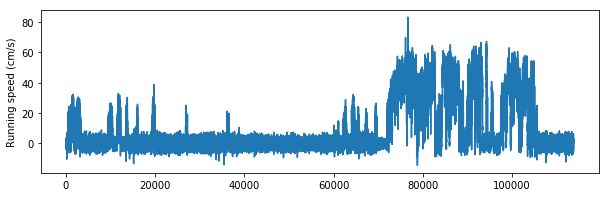

In [39]:
fig = plt.figure(figsize=(10,3))
plt.plot(dxcm)
plt.ylabel("Running speed (cm/s)")

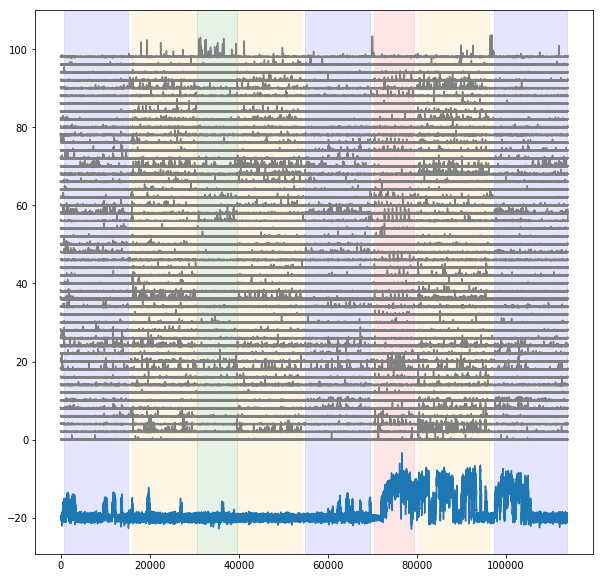

In [40]:
fig = plt.figure(figsize=(10,10))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
plt.plot((0.2*dxcm)-20)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

## 3. Search for cells

The `Cell Specimens Table` is a table of metadata and derived metrics computed for each ROI in the entire dataset. This is accessible for direct download from the website and through the sdk.


In [42]:
cell_specimens = pd.DataFrame(boc.get_cell_specimens())

In [43]:
cell_specimens.shape

(63251, 60)

In [44]:
cell_specimens.head()

,all_stim,area,cell_specimen_id,donor_full_genotype,dsi_dg,experiment_container_id,failed_experiment_container,g_dsi_dg,g_osi_dg,g_osi_sg,...,specimen_id,tfdi_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
0,False,VISp,517397327,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511498742,False,NaN,NaN,NaN,...,502185555,NaN,NaN,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
1,False,VISp,517397340,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,1.461268,511498742,False,0.824858,0.901542,NaN,...,502185555,0.333074,NaN,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
2,False,VISp,517397343,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511498742,False,0.812462,0.894923,NaN,...,502185555,0.258131,NaN,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3,False,VISp,517397347,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511498742,False,0.078742,0.109241,NaN,...,502185555,0.231590,NaN,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
4,False,VISp,517397353,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511498742,False,NaN,NaN,NaN,...,502185555,NaN,NaN,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


> There are 60 columns in this dataframe. Some are metadata, including experiment id, cell_specimen_id, Cre line, targeted area, etc. Others are derived metrics including orientation selectivity, preferred stimulus conditions, receptive field size and location, response reliability, etc. The details on how these are computed are in the White Paper in the `Documentation` Tab on the website. 

In [45]:
cell_specimens.keys()

Index([u'all_stim', u'area', u'cell_specimen_id', u'donor_full_genotype',
       u'dsi_dg', u'experiment_container_id', u'failed_experiment_container',
       u'g_dsi_dg', u'g_osi_dg', u'g_osi_sg', u'image_sel_ns',
       u'imaging_depth', u'osi_dg', u'osi_sg', u'p_dg', u'p_ns',
       u'p_run_mod_dg', u'p_run_mod_ns', u'p_run_mod_sg', u'p_sg',
       u'peak_dff_dg', u'peak_dff_ns', u'peak_dff_sg', u'pref_dir_dg',
       u'pref_image_ns', u'pref_ori_sg', u'pref_phase_sg', u'pref_sf_sg',
       u'pref_tf_dg', u'reliability_dg', u'reliability_nm1_a',
       u'reliability_nm1_b', u'reliability_nm1_c', u'reliability_nm2',
       u'reliability_nm3', u'reliability_ns', u'reliability_sg',
       u'rf_area_off_lsn', u'rf_area_on_lsn', u'rf_center_off_x_lsn',
       u'rf_center_off_y_lsn', u'rf_center_on_x_lsn', u'rf_center_on_y_lsn',
       u'rf_chi2_lsn', u'rf_distance_lsn', u'rf_overlap_index_lsn',
       u'run_mod_dg', u'run_mod_ns', u'run_mod_sg', u'sfdi_sg', u'specimen_id',
       u'tfdi_

> Let's find the cells from our experiment above

In [46]:
subset = cell_specimens[cell_specimens.experiment_container_id==experiment_container_id]

In [47]:
len(subset)

225

> Why are there more cells than we saw in the ROI masks above? (HINT: check your handout)
>
> Let's look at the cells in this experiment that have image #22 (below) as their preferred image.

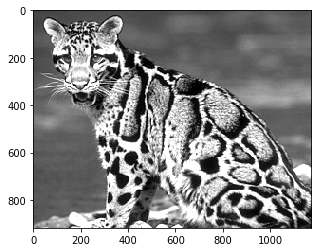

In [48]:
plt.imshow(natural_scene_template[22,:,:], cmap='gray')

In [49]:
subset[(subset.p_ns<0.05)&(subset.pref_image_ns==22)].cell_specimen_id

4933     517472708
4952     517472807
5150     517474078
28643    587377366
Name: cell_specimen_id, dtype: int64

## 4. Plot one neuron's responses to one image

In [50]:
# get the numpy index for this cell id
cell_index = data_set.get_cell_specimen_indices([587377366])[0]

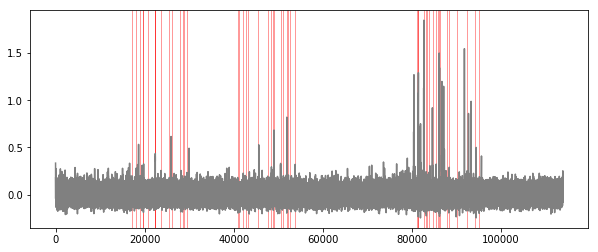

In [51]:
fig = plt.figure(figsize=(10,4))
plt.plot(dff[cell_index,:], color='gray')
    
#shade traces with the time of each presentation of the above scene
stim_subset = natural_scene_table[natural_scene_table.frame==22]
for j in range(len(stim_subset)):
    plt.axvspan(xmin=stim_subset.start.iloc[j], xmax=stim_subset.end.iloc[j], color='red', alpha=0.4)

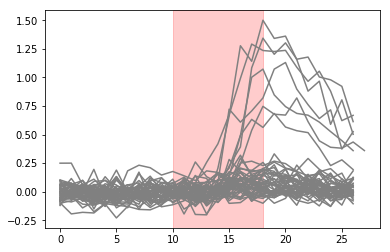

In [52]:
stim_subset = natural_scene_table[natural_scene_table.frame==22]
for i in range(len(stim_subset)):
    plt.plot(dff[cell_index,stim_subset.start.iloc[i]-10:stim_subset.end.iloc[i]+10], color='gray')
plt.axvspan(10,18, color='red',alpha=0.2)